In [30]:
using Pkg
Pkg.activate("../")
Pkg.develop(path="../../TAMBO-MC/Tambo/")

  Activating project at `~/research/tambo_point_source`
   Resolving package versions...
  No Changes to `~/research/tambo_point_source/Project.toml`
  No Changes to `~/research/tambo_point_source/Manifest.toml`


In [31]:
using Tambo
using Revise
using GeoMakie
using CairoMakie
using LinearAlgebra
using Interpolations
using Rotations
using GeoJSON
using NaturalEarth
using ColorSchemes

# using StaticArrays
using Makie.GeometryBasics
using Makie
includet("../src/conversions.jl")
includet("../src/observatories.jl")
includet("../src/patches.jl")
includet("../src/splitting.jl")

In [3]:
path = GeoMakie.assetpath("vector", "countries.geo.json")
json_str = read(path, String)
worldCountries = GeoJSON.read(json_str)

FeatureCollection with 180 Features

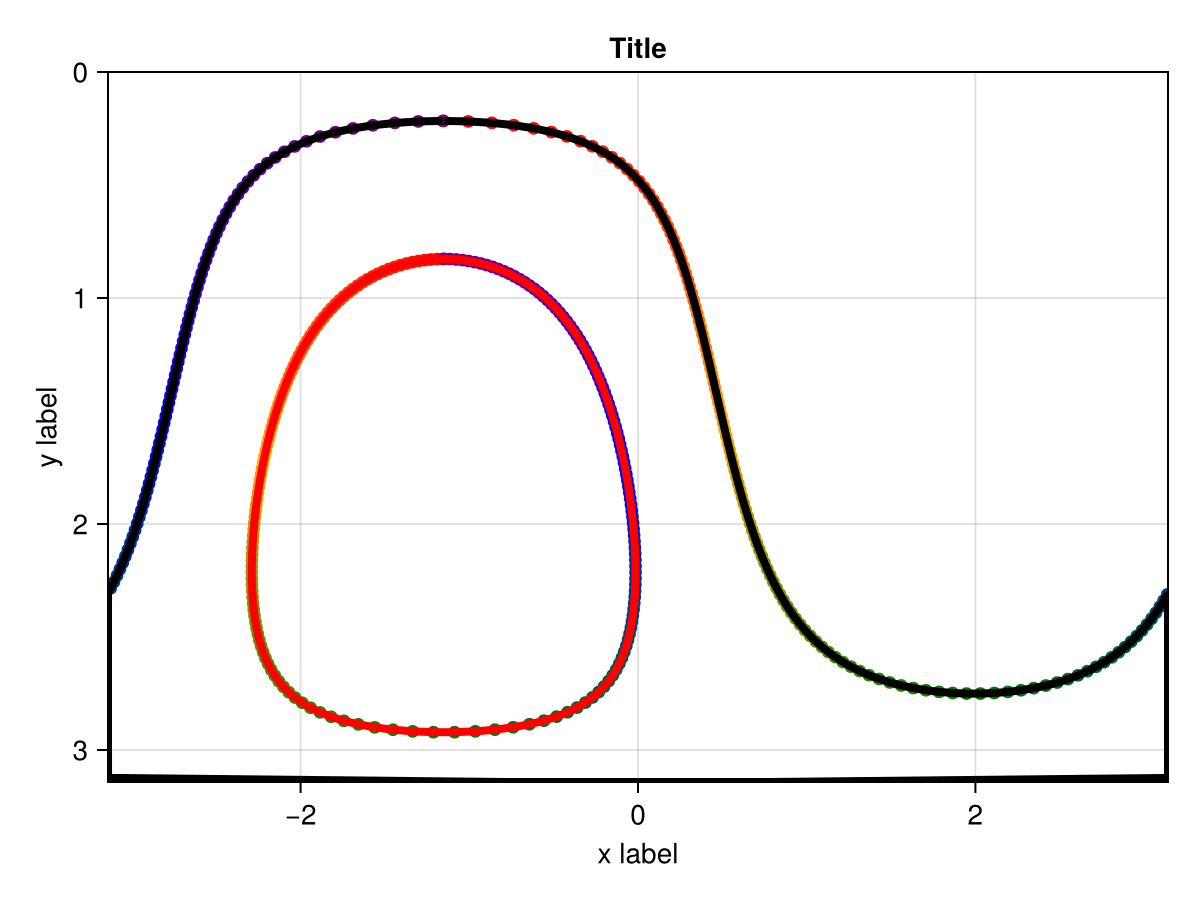

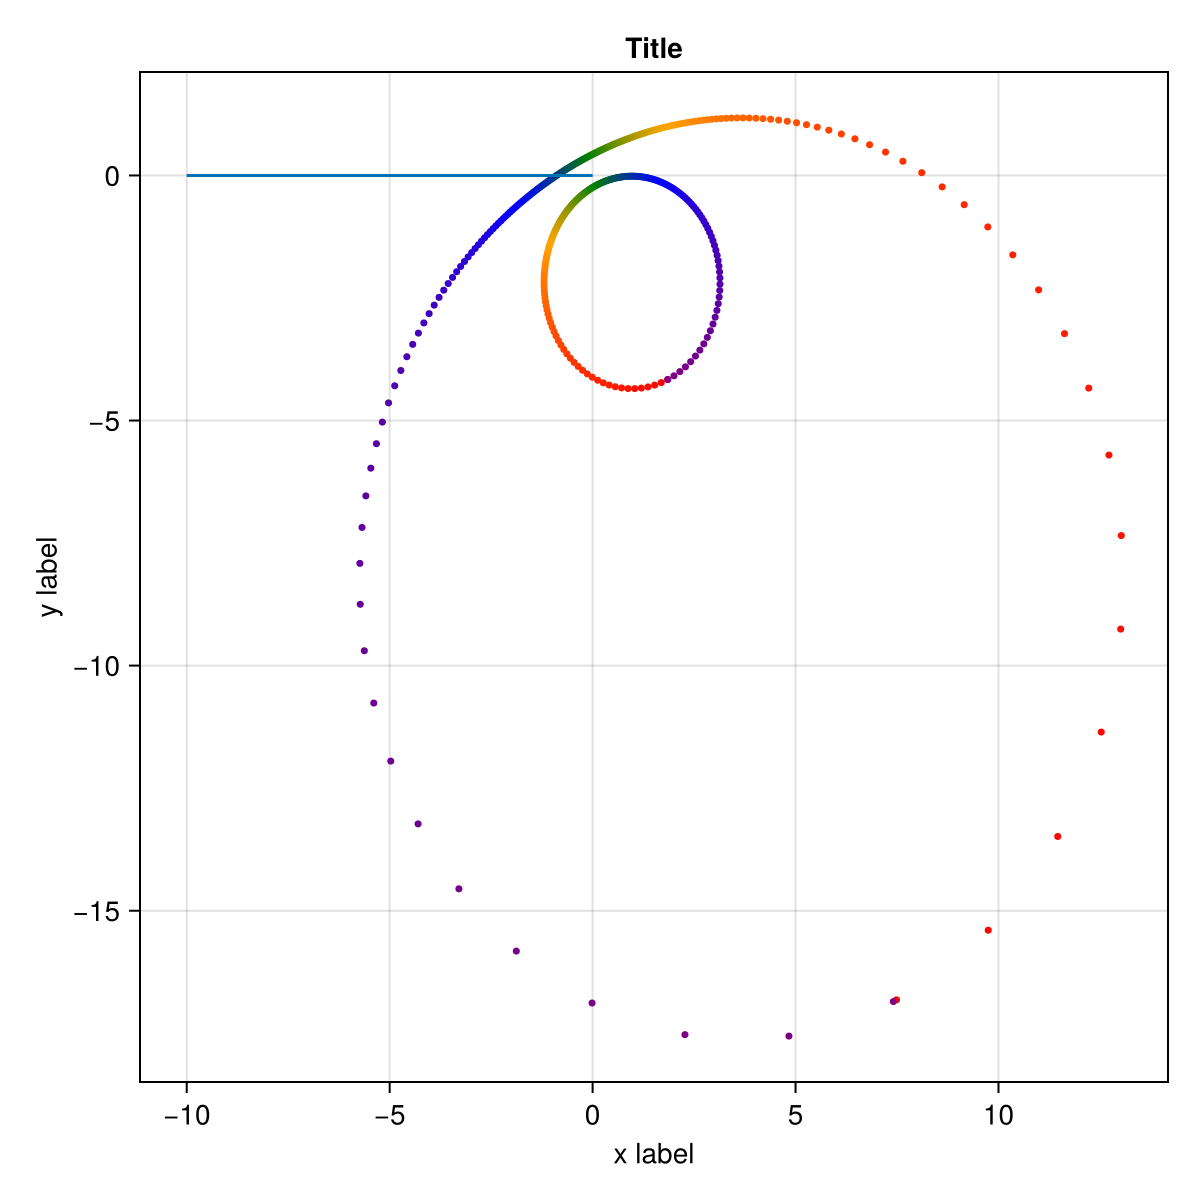

CairoMakie.Screen{IMAGE}


In [5]:
branch = -π
cmap = cgrad(:rainbow, rev=true)

θs = deg2rad.((85, 120))
patch = ClosedPatch(AstroLib.observatories["trident"], θs)
patch = ClosedPatch(patch, branch)
solids, holes = split_along_branch(patch, branch)

f = Figure()

ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
    title = "Title")

scatter!(ax, map(x->x[2], patch.bound1), map(x->x[1], patch.bound1), color=1:length(patch.bound1), colormap=cmap)
scatter!(ax, map(x->x[2], patch.bound2), map(x->x[1], patch.bound2), color=1:length(patch.bound2), colormap=cmap)

for solid in solids
    lines!(ax, map(x->x[2], solid), map(x->x[1], solid), color=:black, linewidth=4)
end
    
for hole in holes
    lines!(ax, map(x->x[2], hole), map(x->x[1], hole), linewidth=4, color=:red)
end

xlims!(ax, branch, branch + 2π)
ylims!(ax, π, 0)

display(f)

stereo_patch1 = map(x->stereographic(x[1], x[2]), patch.bound1)
stereo_patch2 = map(x->stereographic(x[1], x[2]), patch.bound2)

f = Figure(size=(600, 600))

ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
    title = "Title",)


scatter!(ax, map(x->x[1], stereo_patch1), map(x->x[2], stereo_patch1), markersize=5, color=1:length(stereo_patch1), colormap=cmap)
scatter!(ax, map(x->x[1], stereo_patch2), map(x->x[2], stereo_patch2), markersize=5, color=1:length(stereo_patch2), colormap=cmap)
b = RotMatrix{2}(branch) * [10, 0]
lines!([0, b[1]], [0, b[2]])

# ylims!(ax, -10, 10)
# xlims!(ax, -10, 10)

display(f)

In [29]:
typeof(f)

LoadError: UndefVarError: `f` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

length(solids) = 2


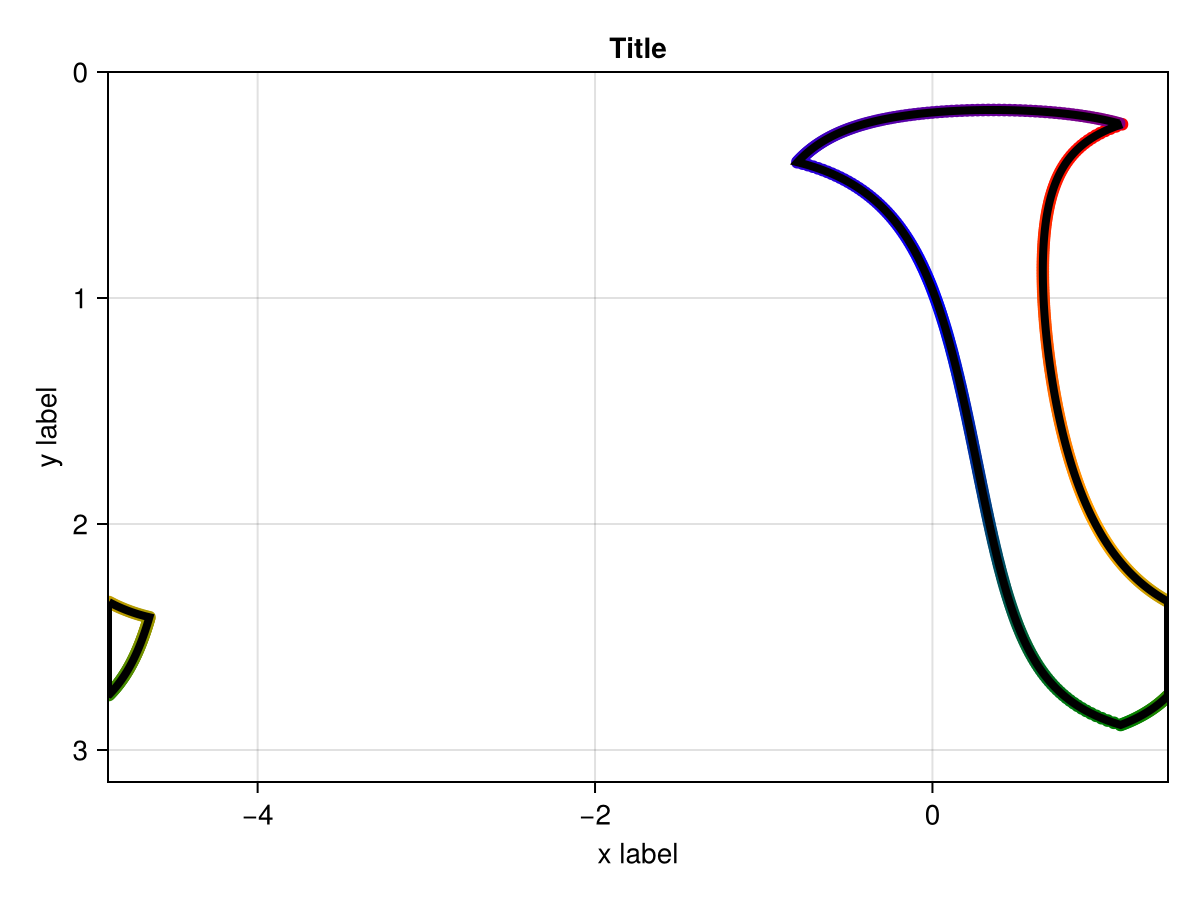

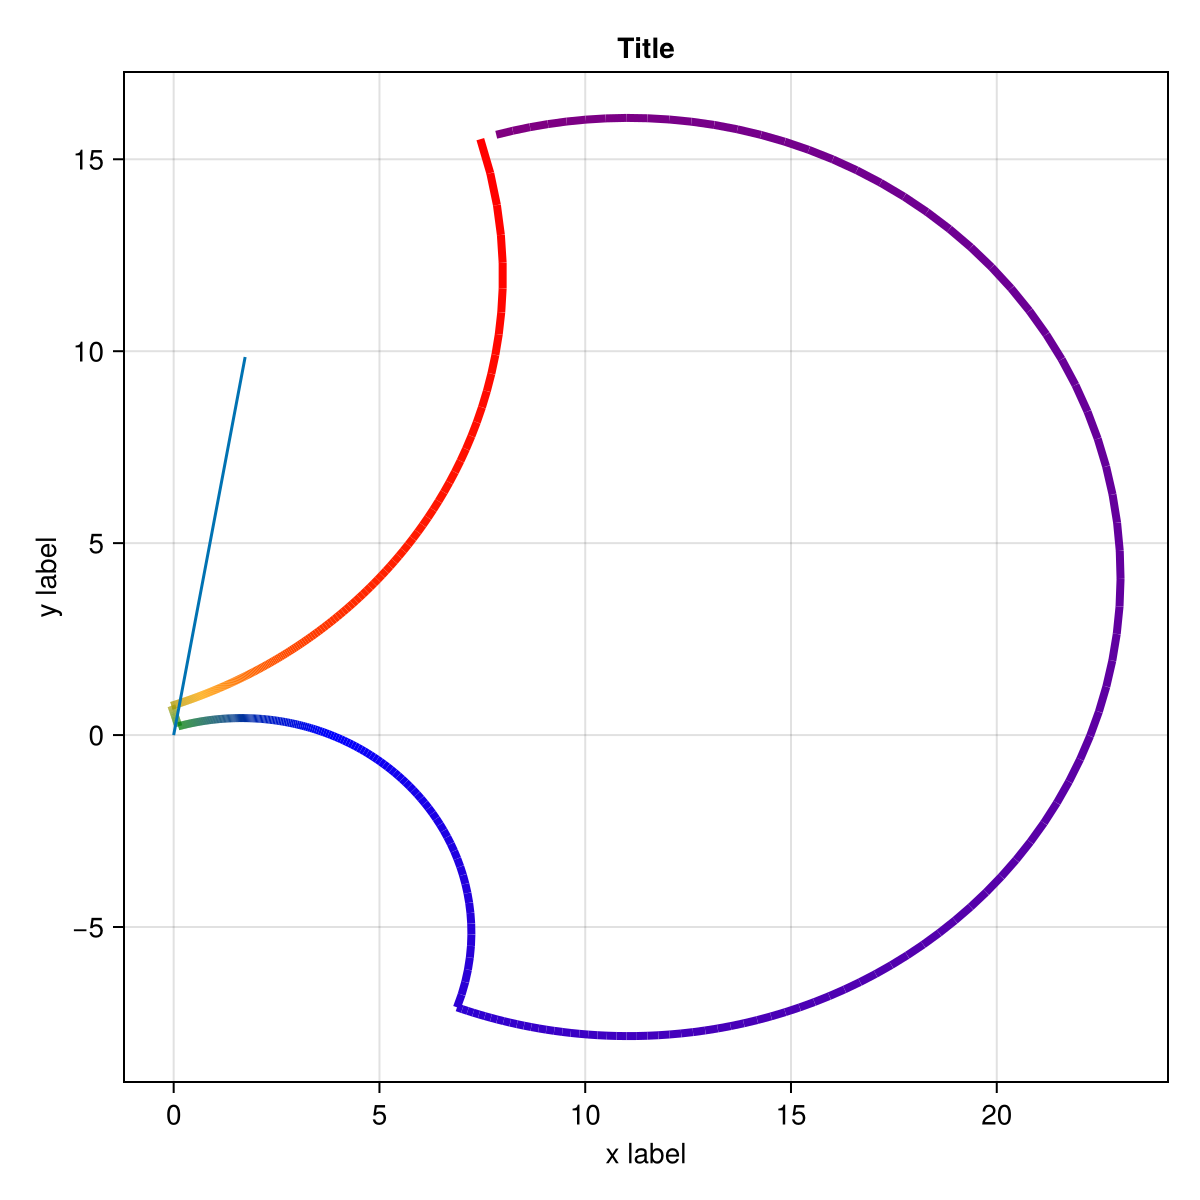

CairoMakie.Screen{IMAGE}


In [6]:
θs = deg2rad.((115, 85))
ϕs = deg2rad.(LinRange(-10, -170, 200))

branch = -π

branch = rand() * 2π - π
branch = -4.886921905584122

patch = OpenPatch(AstroLib.observatories["tambo"], θs, ϕs)
patch = OpenPatch(patch, branch)

solids = split_along_branch(patch, branch)
@show length(solids)

f = Figure()

ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
    title = "Title")

cmap = cgrad(:rainbow, rev=true)

scatter!(ax, map(x->x[2], patch.bound), map(x->x[1], patch.bound), color=1:length(patch.bound), colormap=cmap)
for solid in solids
    lines!(ax, map(x->x[2], solid), map(x->x[1], solid), color=:black, linewidth=4)
end

xlims!(ax, branch, branch + 2π)
ylims!(ax, π, 0)
# vlines!(ax, [branch, branch+2π])

display(f)

stereo_patch = map(x->stereographic(x[1], x[2]), patch.bound)

f = Figure(size=(600, 600))

ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
    title = "Title",)


lines!(
    ax,
    map(x->x[1], stereo_patch),
    map(x->x[2], stereo_patch),
    color=1:length(stereo_patch),
    colormap=cmap,
    linewidth=4
)

b = RotMatrix{2}(branch) * [10, 0]
lines!([0, b[1]], [0, b[2]])

# ylims!(ax, -10, 10)
# xlims!(ax, -10, 10)

display(f)

In [8]:
# # countries_file = GeoMakie.assetpath("vector", "countries.geo.json")
# countries = naturalearth("admin_0_countries", 110)

In [8]:
θs = deg2rad.((85, 115))
ϕs = deg2rad.(LinRange(-10, -170, 200))

branch = rand() * 2π
branch = -π

patch = OpenPatch(AstroLib.observatories["tambo"], θs, ϕs)
patch = OpenPatch(patch, branch)

solids = split_along_branch(patch, branch)

tambo_polygons = Polygon[]

for solid in solids
    p = Polygon(
        Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solid)),
    )
    push!(tambo_polygons, p)
end

In [10]:
θs = deg2rad.((85, 120))

cherenkov_polygons = Polygon[]

observatories = Observatory[
    AstroLib.observatories["trident"],
    AstroLib.observatories["pone"],
    AstroLib.observatories["gvd"],
    AstroLib.observatories["arca"],
    AstroLib.observatories["icecube"],
]

for observatory in observatories
    
    branch = -π
    cmap = cgrad(:rainbow, rev=true)

    patch = ClosedPatch(observatory, θs)
    patch = ClosedPatch(patch, branch)
    solids, holes = split_along_branch(patch, branch)

    if length(holes)==0
        p = Polygon(
            Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
        )
        push!(cherenkov_polygons, p)
    elseif length(holes)==1
        p = Polygon(
            Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
            [Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), holes[1]))],
        )
        push!(cherenkov_polygons, p)
    elseif length(holes)==2
        error("TODO")
    end
end
        


In [9]:
# countries = naturalearth("admin_0_countries", 110)

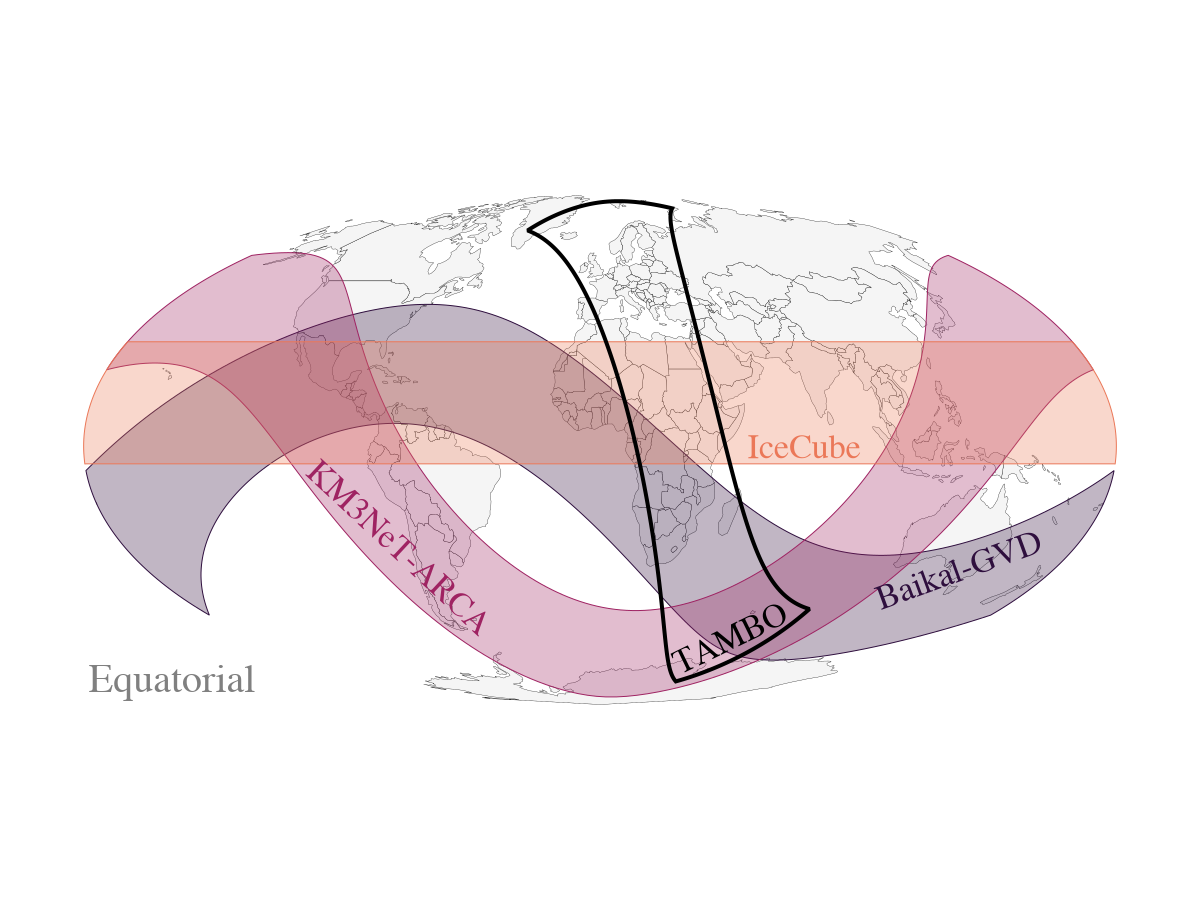

CairoMakie.Screen{IMAGE}


In [14]:
fig = Figure(
    backgroundcolor = :transparent,
    figsize=(1,2)
)
ax = GeoAxis(
    fig[1,1],
    xticklabelsvisible = false,
    yticklabelsvisible = false,
    xgridvisible=false,
    ygridvisible=false,
    dest="+proj=moll"
)

lats = -89.5:1:89.5
lons = 0.5:1:359.5
lons = lons .- 180 # this command MUST be done for things to work

hm = poly!(ax, GeoMakie.to_multipoly(countries.geometry); color=:whitesmoke,
    strokecolor = :black, strokewidth = 0.15,
    shading=NoShading,
)

cs = cgrad(:matter, length(cherenkov_polygons)+1, rev=true, categorical=true)

for (polygon, c) in zip(cherenkov_polygons, cs)
    p = poly!(
        ax,
        polygon,
        color=(c, 0.3),
        strokecolor=c,
        strokewidth=0.5
    )
end

for polygon in tambo_polygons
    p = poly!(
        ax,
        polygon,
        color=:transparent,
        strokecolor=:black,
        strokewidth=2
    )
end

annotation_text = text!(
    ax.scene, Point2f(0.05, 0.05); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative, text = "Equatorial", color=:grey, font = "Times",
    fontsize=20
)

annotation_text = text!(
    ax.scene, Point2f(0.63, 0.47); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "IceCube",
    color=cs[5],
    font = "Times",
    fontsize=17
)

annotation_text = text!(
    ax.scene, Point2f(0.235, 0.445); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "KM3NeT-ARCA",
    color=cs[4],
    font = "Times",
    fontsize=17,
    rotation=-deg2rad(43)
)

annotation_text = text!(
    ax.scene, Point2f(0.75, 0.2); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "Baikal-GVD",
    color=cs[3],
    font = "Times",
    fontsize=17,
    rotation=deg2rad(20)
)

annotation_text = text!(
    ax.scene, Point2f(0.28, 0.78); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "TRIDENT",
    color=cs[1],
    font = "Times",
    fontsize=17,
    rotation=deg2rad(13)
)

annotation_text = text!(
    ax.scene, Point2f(0.15, 0.21); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "P-ONE",
    color=cs[2],
    font = "Times",
    fontsize=17,
    rotation=deg2rad(-3.5)
)

annotation_text = text!(
    ax.scene, Point2f(0.57375, 0.085); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "TAMBO",
    color=:black,
    font = "Times",
    fontsize=17,
    rotation=deg2rad(26)
)

# save("../figures/skymap.svg", fig)
display(fig)

In [11]:
function cshift(lons, field, lon_0)
   shift = @. lons - lon_0 > 180
   nn = sum(shift)
   (circshift(lons - 360shift, nn), circshift(field, (nn, 0)))
end

cshift (generic function with 1 method)

In [12]:
lons = -180:180
lats = -90:90
field = [exp(cosd(l)) + 3(y/90) for l in lons, y in lats]

lon_0 = -160
(lons_shift, field_shift) = cshift(lons, field, lon_0)

([-339, -338, -337, -336, -335, -334, -333, -332, -331, -330  …  11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [-0.4563999336474307 -0.4230666003140975 … 5.510266733019236 5.543600066352569; -0.47261832807133697 -0.43928499473800375 … 5.49404833859533 5.527381671928663; … ; -0.42585207717080964 -0.3925187438374764 … 5.540814589495858 5.574147922829191; -0.4408053458235157 -0.4074720124901825 … 5.525861320843151 5.559194654176484])

In [13]:
black = cgrad([:black, :black])

In [14]:
cs1 = ColorScheme([
    colorant"#29a2c6",
    colorant"#ffcb18",
    colorant"#ff6d31",
    colorant"#ef597b",
    colorant"#9467bd",
    colorant"#73b66b",
])

In [16]:
using ProgressBars

In [86]:
lons = -180:180
lats = -90:90
field = [0.0 for l in lons, y in lats]
θs = deg2rad.((85, 120))

for (idx, lon_0) in ProgressBar(enumerate(0:-1:-359))
    
    (lons_shift, field_shift) = cshift(lons, field, lon_0)

    fig = Figure()
    ax = GeoAxis(
        fig[1,1];
        xticklabelsvisible = false,
        yticklabelsvisible = false,
        xgridvisible=false,
        ygridvisible=false,
        dest = "+proj=moll +lon_0=$(lon_0)"
    )

    surface!(ax, lons_shift, lats, field_shift, colormap=black)

    cls = GeoMakie.coastlines()
    fixed_cls = split.(cls, lon_0)
    if mod(idx, 10)==1
        cs = cs1[rand(1:length(cs1), length(cls))]
    end
    
    for (l, c) in zip(fixed_cls, cs) 
        lines!.(ax, l, color=c)
    end

    observatory = AstroLib.observatories["trident"]
    branch = deg2rad(lon_0) - π
    patch = ClosedPatch(observatory, θs)
    patch = ClosedPatch(patch, branch)
    solids, holes = split_along_branch(patch, branch)

    if length(holes)==0
        polygon = Polygon(
            Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
        )
    elseif length(holes)==1
        polygon = Polygon(
            Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
            [Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), holes[1]))],
        )
    elseif length(holes)==2
        error("TODO")
    end

    p = poly!(
        ax,
        polygon,
        color=(:white, 0.3),
        strokecolor=:white,
        strokewidth=0.5
    )
    save("../figures/trident_gif_60fps/$(lpad(idx, 3, "0")).png", fig)
#     display(fig)
end

0.0%┣                                              ┫ 0/360 [00:00<00:00, -0s/it]
0.3%┣▏                                         ┫ 1/360 [00:01<Inf:Inf, InfGs/it]
0.6%┣▎                                              ┫ 2/360 [00:02<13:37, 2s/it]
0.8%┣▍                                              ┫ 3/360 [00:03<10:05, 2s/it]
1.1%┣▌                                              ┫ 4/360 [00:05<08:55, 2s/it]
1.4%┣▋                                              ┫ 5/360 [00:06<08:41, 1s/it]
1.7%┣▉                                              ┫ 6/360 [00:07<08:12, 1s/it]
1.9%┣█                                              ┫ 7/360 [00:08<07:52, 1s/it]
2.2%┣█                                              ┫ 8/360 [00:09<07:39, 1s/it]
2.5%┣█▏                                             ┫ 9/360 [00:10<07:29, 1s/it]
2.8%┣█▎                                            ┫ 10/360 [00:11<07:21, 1s/it]
3.1%┣█▍                                            ┫ 11/360 [00:12<07:15, 1s/it]
3.3%┣█▌                     

27.5%┣████████████▍                                ┫ 99/360 [01:49<04:51, 1s/it]
27.8%┣████████████▎                               ┫ 100/360 [01:50<04:50, 1s/it]
28.1%┣████████████▍                               ┫ 101/360 [01:51<04:49, 1s/it]
28.3%┣████████████▌                               ┫ 102/360 [01:53<04:48, 1s/it]
28.6%┣████████████▋                               ┫ 103/360 [01:54<04:47, 1s/it]
28.9%┣████████████▊                               ┫ 104/360 [01:55<04:46, 1s/it]
29.2%┣████████████▉                               ┫ 105/360 [01:56<04:44, 1s/it]
29.4%┣█████████████                               ┫ 106/360 [01:57<04:43, 1s/it]
29.7%┣█████████████                               ┫ 107/360 [01:58<04:42, 1s/it]
30.0%┣█████████████▏                              ┫ 108/360 [01:59<04:40, 1s/it]
30.3%┣█████████████▎                              ┫ 109/360 [02:00<04:39, 1s/it]
30.6%┣█████████████▌                              ┫ 110/360 [02:01<04:38, 1s/it]
30.8%┣█████████████▋        

70.0%┣██████████████████████████████▉             ┫ 252/360 [04:36<01:59, 1s/it]
70.3%┣███████████████████████████████             ┫ 253/360 [04:37<01:58, 1s/it]
70.6%┣███████████████████████████████             ┫ 254/360 [04:38<01:57, 1s/it]
70.8%┣███████████████████████████████▏            ┫ 255/360 [04:39<01:55, 1s/it]
71.1%┣███████████████████████████████▎            ┫ 256/360 [04:41<01:54, 1s/it]
71.4%┣███████████████████████████████▍            ┫ 257/360 [04:42<01:53, 1s/it]
71.7%┣███████████████████████████████▌            ┫ 258/360 [04:43<01:52, 1s/it]
71.9%┣███████████████████████████████▋            ┫ 259/360 [04:44<01:51, 1s/it]
72.2%┣███████████████████████████████▉            ┫ 260/360 [04:45<01:50, 1s/it]
72.5%┣████████████████████████████████            ┫ 261/360 [04:46<01:49, 1s/it]
72.8%┣████████████████████████████████            ┫ 262/360 [04:47<01:48, 1s/it]
73.1%┣████████████████████████████████▏           ┫ 263/360 [04:48<01:47, 1s/it]
73.3%┣██████████████████████

In [35]:
tambo_country_names = ["United States of America", "Canada", "Peru", "Spain", "Australia", "Belgium", "Denmark"]

7-element Vector{String}:
 "United States of America"
 "Canada"
 "Peru"
 "Spain"
 "Australia"
 "Belgium"
 "Denmark"

In [4]:
θs = deg2rad.((85, 120))

cherenkov_polygons = Polygon[]

observatories = Observatory[
#     AstroLib.observatories["trident"],
#     AstroLib.observatories["pone"],
#     AstroLib.observatories["gvd"],
    AstroLib.observatories["icecube"],
    AstroLib.observatories["arca"],
    AstroLib.observatories["orca"],

]

for observatory in observatories
    
    branch = -π
    cmap = cgrad(:rainbow, rev=true)

    patch = ClosedPatch(observatory, θs)
    patch = ClosedPatch(patch, branch)
    solids, holes = split_along_branch(patch, branch)

    if length(holes)==0
        p = Polygon(
            Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
        )
        push!(cherenkov_polygons, p)
    elseif length(holes)==1
        p = Polygon(
            Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
            [Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), holes[1]))],
        )
        push!(cherenkov_polygons, p)
    elseif length(holes)==2
        error("TODO")
    end
end
        


In [6]:
arrow_path = BezierPath([
    MoveTo(Point(0, 0)),
    LineTo(Point(0.3, -0.3)),
    LineTo(Point(0.15, -0.3)),
    LineTo(Point(0.3, -1)),
    LineTo(Point(0, -0.9)),
    LineTo(Point(-0.3, -1)),
    LineTo(Point(-0.15, -0.3)),
    LineTo(Point(-0.3, -0.3)),
    ClosePath()
])

BezierPath(Union{ClosePath, CurveTo, EllipticalArc, LineTo, MoveTo}[MoveTo([0.0, 0.0]), LineTo([0.3, -0.3]), LineTo([0.15, -0.3]), LineTo([0.3, -1.0]), LineTo([0.0, -0.9]), LineTo([-0.3, -1.0]), LineTo([-0.15, -0.3]), LineTo([-0.3, -0.3]), ClosePath()], HyperRectangle{2, Float64}([-0.3, -1.0], [0.6, 1.0]), 0x156affe6)

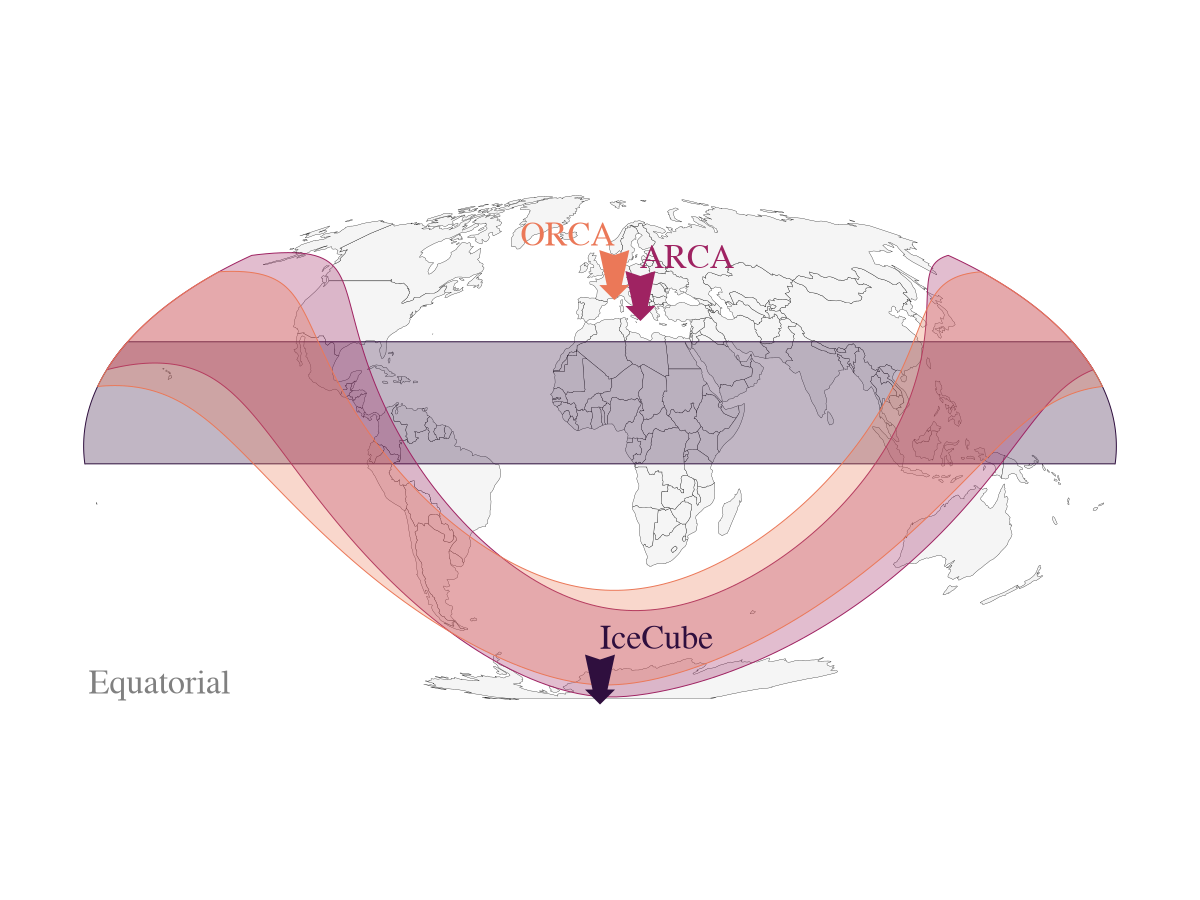

CairoMakie.Screen{IMAGE}


In [28]:
fig = Figure(
    backgroundcolor = :transparent,
    figsize=(1,2)
)
ax = GeoAxis(
    fig[1,1],
    xticklabelsvisible = false,
    yticklabelsvisible = false,
    xgridvisible=false,
    ygridvisible=false,
    dest="+proj=moll"
)

lats = -89.5:1:89.5
lons = 0.5:1:359.5
lons = lons .- 180 # this command MUST be done for things to work

hm = poly!(ax, GeoMakie.to_multipoly(worldCountries.geometry); color=:whitesmoke,
    strokecolor = :black, strokewidth = 0.15,
    shading=NoShading,
)

cs = cgrad(:matter, length(cherenkov_polygons)+1, rev=true, categorical=true)

for (polygon, c) in zip(cherenkov_polygons, cs)
    p = poly!(
        ax,
        polygon,
        color=(c, 0.3),
        strokecolor=c,
        strokewidth=0.5
    )
end

scatter!(
    ax,
    [rad2deg(x.longitude) for x in observatories],
    [rad2deg(x.latitude) for x in observatories],
    color=1:length(observatories)+1,
    colormap=cs,
    marker = arrow_path,
    rotation=π,
    markersize=25

)

annotation_text = text!(
    ax.scene,
    Point2f(0.05, 0.05); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative, text = "Equatorial", color=:grey, font = "Times",
    fontsize=17
)

annotation_text = text!(
    ax.scene,
    Point2f(0.5, 0.13); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "IceCube",
    color=cs[1],
    font = "Times",
    fontsize=17
)

annotation_text = text!(
    ax.scene,
    Point2f(0.535, 0.81); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "ARCA",
    color=cs[2],
    font = "Times",
    fontsize=17,
)

annotation_text = text!(
    ax.scene,
    Point2f(0.43, 0.85); # plotting in relative coordinates - (0, 0) is bottom left, (1, 1) is top right
    space = :relative,
    text = "ORCA",
    color=cs[3],
    font = "Times",
    fontsize=17,
)


save("../../../talks/uclouvain_overview/figures/skymap.svg", fig)
display(fig)

In [49]:
tambo_countries = GeoJSON.FeatureCollection(;
    features=[x for x in worldCountries if x.name ∈ tambo_country_names]
)

FeatureCollection with 7 Features

In [66]:
a = tambo_countries.geometry[1]

2D MultiPolygonwith 2 sub-geometries

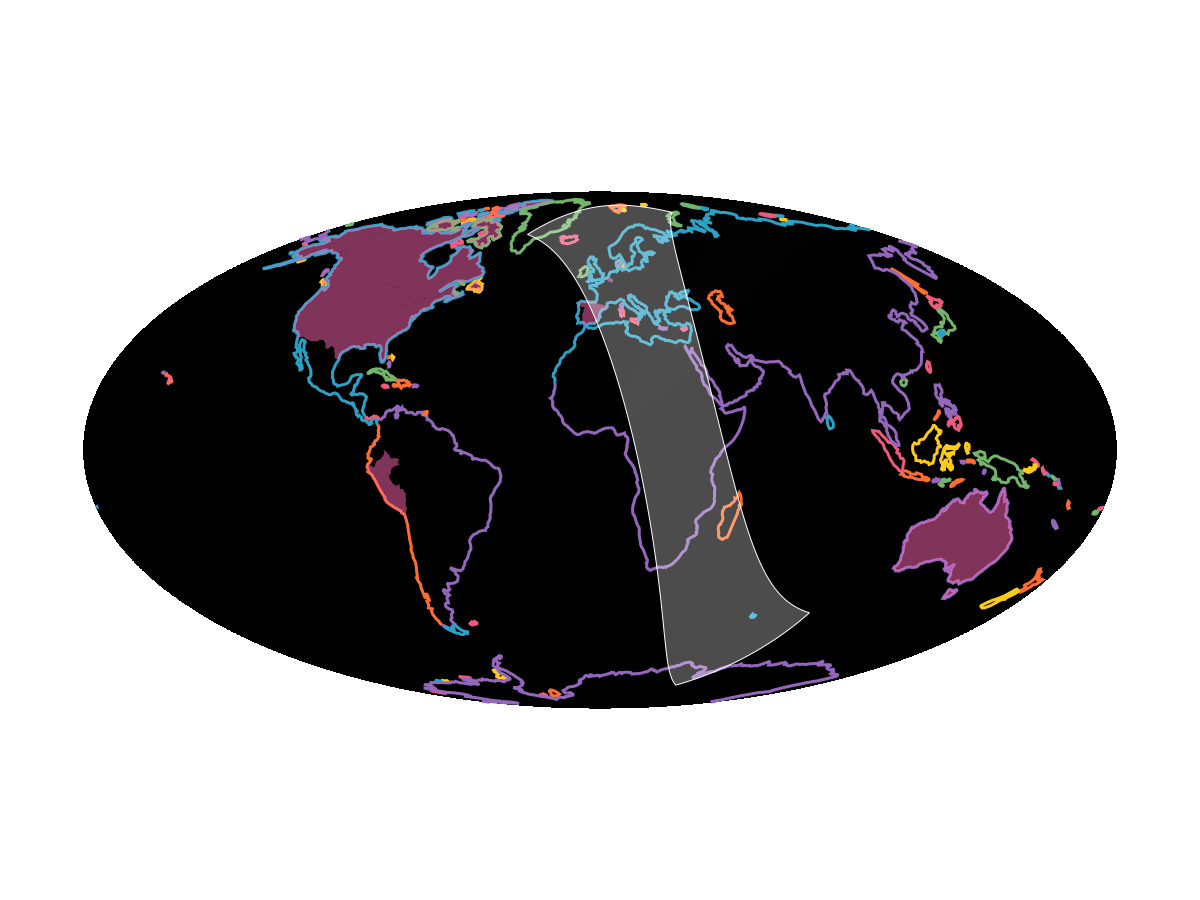

CairoMakie.Screen{IMAGE}


In [70]:
lons = -180:180
lats = -90:90
field = [0.0 for l in lons, y in lats]

θs = deg2rad.((115, 85))
ϕs = deg2rad.(LinRange(-10, -170, 200))

cs = cs1[rand(1:length(cs1), length(cls))]
    
# for (idx, lon_0) in enumerate(0:-10:-359)
for (idx, lon_0) in ProgressBar(enumerate(0:-1:-359))
    
    (lons_shift, field_shift) = cshift(lons, field, lon_0)

    fig = Figure()
    ax = GeoAxis(
        fig[1,1];
        xticklabelsvisible = false,
        yticklabelsvisible = false,
        xgridvisible=false,
        ygridvisible=false,
        dest = "+proj=moll +lon_0=$(lon_0)"
    )

    surface!(ax, lons_shift, lats, field_shift, colormap=black)

    if mod(idx, 10)==1
        cs = cs1[rand(1:length(cs1), length(cls))]
    end
        
    cls = GeoMakie.coastlines()
    fixed_cls = split.(cls, lon_0)

    for (l, c) in zip(fixed_cls, cs) 
        lines!.(ax, l, color=c)
    end
    

#     hm2 = poly!(
#         ax,
#         GeoMakie.to_multipoly(tambo_countries.geometry);
#         color=(:hotpink, 0.5),
#         strokecolor = :transparent
#     )

    observatory = AstroLib.observatories["tambo"]
    branch = deg2rad(lon_0) - π
    patch = OpenPatch(AstroLib.observatories["tambo"], θs, ϕs, ngeodesic=200)
    patch = OpenPatch(patch, branch)

    solids = split_along_branch(patch, branch, n=50)
    
    for solid in solids
        polygon = Polygon(
            Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solid)),
        )

        p = poly!(
            ax,
            polygon,
            color=(:white, 0.3),
            strokecolor=:white,
            strokewidth=0.5
        )
    end
    
    save("../figures/tambo_gif_60fps/$(lpad(idx, 3, "0")).png", fig)
#     display(fig)
# end

# Global vision

In [103]:
lons = -180:180
lats = -90:90
field = [0.0 for l in lons, y in lats]
θs = deg2rad.((85, 120))

    
for (idx, lon_0) in ProgressBar(enumerate(0:-1:-359))
    @show idx
    (lons_shift, field_shift) = cshift(lons, field, lon_0)

    fig = Figure()
    ax = GeoAxis(
        fig[1,1];
        xticklabelsvisible = false,
        yticklabelsvisible = false,
        xgridvisible=false,
        ygridvisible=false,
        dest = "+proj=moll +lon_0=$(lon_0)"
    )

    surface!(ax, lons_shift, lats, field_shift, colormap=black)

    cls = GeoMakie.coastlines()
    fixed_cls = split.(cls, lon_0)
    if mod(idx, 10)==1
        cs = cs1[rand(1:length(cs1), length(cls))]
    end
    
    for (l, c) in zip(fixed_cls, cs) 
        lines!.(ax, l, color=c)
    end
    
    branch = deg2rad(lon_0) - π
        
    
    for observatory in [AstroLib.observatories["icecube"], AstroLib.observatories["arca"], AstroLib.observatories["pone"], AstroLib.observatories["trident"], AstroLib.observatories["gvd"]]
    
        patch = ClosedPatch(observatory, θs)
        patch = ClosedPatch(patch, branch)
        solids, holes = split_along_branch(patch, branch, n=51)

        if length(holes)==0
            polygon = Polygon(
                Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
            )
        elseif length(holes)==1
            polygon = Polygon(
                Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
                [Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), holes[1]))],
            )
        elseif length(holes)==2
            error("TODO")
        end

        p = poly!(
            ax,
            polygon,
            color=(:white, 0.3),
            strokecolor=:white,
            strokewidth=0.5
        )
    end
    save("../figures/cherenkov_gif_60fps/$(lpad(idx, 3, "0")).svg", fig)
#     display(fig)
end

idx = 1
idx = 2
idx = 3
idx = 4


0.0%┣                                              ┫ 0/360 [00:00<00:00, -0s/it]
0.3%┣▏                                         ┫ 1/360 [00:39<Inf:Inf, InfGs/it]
0.6%┣▎                                          ┫ 2/360 [00:57<05:40:25, 57s/it]
0.8%┣▍                                          ┫ 3/360 [01:07<03:18:04, 33s/it]


LoadError: InterruptException:

In [108]:
lons = -180:180
lats = -90:90
field = [0.0 for l in lons, y in lats]
θs = deg2rad.((85, 120))

    
for (idx, lon_0) in ProgressBar(enumerate(0:-1:-359))
    (lons_shift, field_shift) = cshift(lons, field, lon_0)

    fig = Figure()
    ax = GeoAxis(
        fig[1,1];
        xticklabelsvisible = false,
        yticklabelsvisible = false,
        xgridvisible=false,
        ygridvisible=false,
        dest = "+proj=moll +lon_0=$(lon_0)"
    )

    surface!(ax, lons_shift, lats, field_shift, colormap=black)

    cls = GeoMakie.coastlines()
    fixed_cls = split.(cls, lon_0)
    if mod(idx, 10)==1
        cs = cs1[rand(1:length(cs1), length(cls))]
    end
    
    for (l, c) in zip(fixed_cls, cs) 
        lines!.(ax, l, color=c)
    end
    
    branch = deg2rad(lon_0) - π
        
    
    for observatory in [AstroLib.observatories["icecube"], AstroLib.observatories["arca"], AstroLib.observatories["orca"]]
    
        patch = ClosedPatch(observatory, θs)
        patch = ClosedPatch(patch, branch)
        solids, holes = split_along_branch(patch, branch, n=51)

        if length(holes)==0
            polygon = Polygon(
                Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
            )
        elseif length(holes)==1
            polygon = Polygon(
                Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), solids[1])),
                [Point2f.(map(x->(rad2deg(x[2]), rad2deg(π/2 - x[1])), holes[1]))],
            )
        elseif length(holes)==2
            error("TODO")
        end

        p = poly!(
            ax,
            polygon,
            color=(:white, 0.3),
            strokecolor=:white,
            strokewidth=0.5
        )
    end
    save("../figures/ickm3_gif_60fps/$(lpad(idx, 3, "0")).png", fig)
#     display(fig)
end

0.0%┣                                              ┫ 0/360 [00:00<00:00, -0s/it]
0.3%┣▏                                         ┫ 1/360 [00:02<Inf:Inf, InfGs/it]
0.6%┣▎                                              ┫ 2/360 [00:03<19:23, 3s/it]
0.8%┣▍                                              ┫ 3/360 [00:05<13:45, 2s/it]
1.1%┣▌                                              ┫ 4/360 [00:06<12:26, 2s/it]
1.4%┣▋                                              ┫ 5/360 [00:07<11:00, 2s/it]
1.7%┣▉                                              ┫ 6/360 [00:09<10:04, 2s/it]
1.9%┣█                                              ┫ 7/360 [00:10<09:27, 2s/it]
2.2%┣█                                              ┫ 8/360 [00:11<09:01, 2s/it]
2.5%┣█▏                                             ┫ 9/360 [00:12<08:42, 1s/it]
2.8%┣█▎                                            ┫ 10/360 [00:13<08:25, 1s/it]
3.1%┣█▍                                            ┫ 11/360 [00:14<08:17, 1s/it]
3.3%┣█▌                     

27.5%┣████████████▍                                ┫ 99/360 [01:57<05:11, 1s/it]
27.8%┣████████████▎                               ┫ 100/360 [01:58<05:10, 1s/it]
28.1%┣████████████▍                               ┫ 101/360 [01:59<05:08, 1s/it]
28.3%┣████████████▌                               ┫ 102/360 [02:00<05:07, 1s/it]
28.6%┣████████████▋                               ┫ 103/360 [02:01<05:06, 1s/it]
28.9%┣████████████▊                               ┫ 104/360 [02:03<05:04, 1s/it]
29.2%┣████████████▉                               ┫ 105/360 [02:04<05:03, 1s/it]
29.4%┣█████████████                               ┫ 106/360 [02:05<05:02, 1s/it]
29.7%┣█████████████                               ┫ 107/360 [02:06<05:00, 1s/it]
30.0%┣█████████████▏                              ┫ 108/360 [02:07<04:59, 1s/it]
30.3%┣█████████████▎                              ┫ 109/360 [02:08<04:57, 1s/it]
30.6%┣█████████████▌                              ┫ 110/360 [02:09<04:56, 1s/it]
30.8%┣█████████████▋        

70.0%┣██████████████████████████████▉             ┫ 252/360 [04:51<02:05, 1s/it]
70.3%┣███████████████████████████████             ┫ 253/360 [04:52<02:04, 1s/it]
70.6%┣███████████████████████████████             ┫ 254/360 [04:54<02:03, 1s/it]
70.8%┣███████████████████████████████▏            ┫ 255/360 [04:55<02:02, 1s/it]
71.1%┣███████████████████████████████▎            ┫ 256/360 [04:57<02:01, 1s/it]
71.4%┣███████████████████████████████▍            ┫ 257/360 [04:58<02:00, 1s/it]
71.7%┣███████████████████████████████▌            ┫ 258/360 [04:59<01:59, 1s/it]
71.9%┣███████████████████████████████▋            ┫ 259/360 [05:00<01:57, 1s/it]
72.2%┣███████████████████████████████▉            ┫ 260/360 [05:01<01:56, 1s/it]
72.5%┣████████████████████████████████            ┫ 261/360 [05:02<01:55, 1s/it]
72.8%┣████████████████████████████████            ┫ 262/360 [05:03<01:54, 1s/it]
73.1%┣████████████████████████████████▏           ┫ 263/360 [05:05<01:53, 1s/it]
73.3%┣██████████████████████

# Detritis

In [3]:
# function rebranch(v::Real, branch::Real)
#     while v < branch
#         v += 2π
#     end
#     while branch + 2π <= v
#         v -= 2π
#     end
#     return v
# end

# function stereographic(θ, ϕ; rmin=1e-5, rmax=1e5)
#     r = 2 * tan((π - θ) / 2)
#     r = minimum([r, rmax])
#     r = maximum([r, rmin])
#     x, y = r * cos(ϕ), r * sin(ϕ)
#     return [x, y]
# end

# function inv_stereographic(x, y; rmin=1e-5, rmax=1e5, branch=0.0)
#     ϕ = rebranch(atan(y, x), branch)
#     r = sqrt(x^2 + y^2)
#     θ = π - 2 * atan(r / 2)
#     return [θ, ϕ]
# end
# function sph_to_cart(θ, ϕ)
#     return [cos(ϕ) * sin(θ), sin(ϕ) * sin(θ), cos(θ)]
# end

# function cart_to_sph(x, y, z)
#     z /= sqrt(x^2 + y^2 + z^2)
#     return [acos(z), atan(y, x)]
# end

# normalize_vector(v) = v / norm(v)

# function geodesic_on_sphere(θ1, ϕ1, θ2, ϕ2; num_points=100)
    
#     p1 = sph_to_cart(θ1, ϕ1)
#     p2 = sph_to_cart(θ2, ϕ2)
    
#     # Compute the axis of rotation and angle
#     cross_prod = cross(p1, p2)
#     dot_prod = dot(p1, p2)
#     angle = acos(dot_prod)
    
#     # Create a rotation matrix
#     function rotation_matrix(axis, θ)
#         x, y, z = axis
#         c, s = cos(θ), sin(θ)
#         R = [
#             c + x^2*(1-c)      x*y*(1-c) - z*s  x*z*(1-c) + y*s
#             y*x*(1-c) + z*s    c + y^2*(1-c)    y*z*(1-c) - x*s
#             z*x*(1-c) - y*s    z*y*(1-c) + x*s  c + z^2*(1-c)
#         ]
#         return R
#     end
    
#     # Generate points along the geodesic
#     geodesic_points = []
#     for t in range(0, 1, length=num_points)
#         θ = t * angle
#         R = rotation_matrix(normalize_vector(cross_prod), θ)
#         push!(geodesic_points, cart_to_sph((R * p1)...))
#     end
#     return geodesic_points
# end

# function rebranch(pts::Vector{Vector{Float64}}, branch::Real)
#     for pt in pts
#         pt[2] = rebranch(pt[2], branch)
#     end 
#     return pts
# end

# abstract type Patch end

# struct OpenPatch <: Patch
#     bound::Vector{Vector{Float64}}
# end


# function OpenPatch(patch::OpenPatch, branch::Real)
#     bound = rebranch(patch.bound, branch)
#     return OpenPatch(bound)
# end

# function OpenPatch(
#     obs::AstroLib.Observatory,
#     θs::Tuple{T, T},
#     ϕs::Vector{T};
#     ngeodesic=100
# ):: OpenPatch where T <: Real 
    
#     pts = Vector{Float64}[]

#     idx = 1
#     θ = θs[1]
#     for ϕ in ϕs
#         push!(pts, zenazi_2_localcodecha(obs, θ, ϕ))
#         idx += 1
#     end

#     θ2, ϕ2 = coδ, ha = zenazi_2_localcodecha(obs, θs[2], ϕs[end])
#     geo_pts = geodesic_on_sphere(pts[idx-1][1], pts[idx-1][2], θ2, ϕ2)[2:end-1]

#     for geo_pt in geo_pts
#         push!(pts, geo_pt)
#         idx +=1
#     end
    
#     θ = θs[2]
#     for ϕ in reverse(ϕs)
#         push!(pts, zenazi_2_localcodecha(obs, θ, ϕ))
#         idx += 1
#     end

#     θ2, ϕ2 = coδ, ha = zenazi_2_localcodecha(obs, θs[1], ϕs[1])
#     geo_pts = geodesic_on_sphere(pts[idx-1][1], pts[idx-1][2], θ2, ϕ2)[2:end-1]

#     for geo_pt in geo_pts
#         push!(pts, geo_pt)
#         idx +=1
#     end
#     return OpenPatch(pts)
# end

# struct ClosedPatch <: Patch
#     bound1::Vector{Vector{Float64}}
#     bound2::Vector{Vector{Float64}}
# end

# function ClosedPatch(patch::ClosedPatch, branch::Real)
#     bound1 = rebranch(patch.bound1, branch)
#     bound2 = rebranch(patch.bound2, branch)
#     return ClosedPatch(bound1, bound2)
# end

# function ClosedPatch(
#     obs::AstroLib.Observatory,
#     θs::Tuple{T, T}
# ) where T <: Real
#     ϕs = LinRange(0, 2π-0.001, 200)
#     bound1 = [zenazi_2_localcodecha(obs, θs[1], ϕ) for ϕ in ϕs]
#     bound2 = [zenazi_2_localcodecha(obs, θs[2], ϕ) for ϕ in reverse(ϕs)]
#     return ClosedPatch(bound1, bound2)
# end

# struct Crossing
#     pt0::Vector{Float64}
#     pt1::Vector{Float64}
#     x0::Float64
# end

# function Crossing(pt1, pt2)
#     m = (pt1[2] - pt2[2]) / (pt1[1] - pt2[1])
#     x0 = -pt1[2] / m  + pt1[1]
#     return Crossing(pt1, pt2, x0)
# end

# function find_next_crossing(crossing, crossings)
#     current_idx = findfirst([c==crossing for c in crossings])
#     R = RotMatrix2(-π / 2)
#     tangent = crossing.pt0 - crossing.pt1
#     s = Int(sign((R * tangent)[1]))
#     if s + current_idx==0
#         return "origin"
#     elseif s + current_idx > length(crossings)
#         return "infinity"
#     else
#         return crossings[s + current_idx]
#     end
# end

# function crossed_branch(pt1, pt2)
#     d = (sign(pt1[2]) - sign(pt2[2]))==0
#     if d
#         return false
#     end
#     if pt1[1] > 0 && pt2[1] > 0
#         return true
#     elseif pt1[1] < 0 && pt2[1] < 0
#         return false
#     end
#     error("Implement the edgecase check, dummy")
# end

# function split_along_branch(patch::ClosedPatch, branch::Real; small=1e-5, big=1e5)
#     holes = []
#     solids = []
#     crossings = []
#     R = RotMatrix2(-branch)
#     for (idx, bound) in enumerate([patch.bound1, patch.bound2])
#         stereo_bound = map(x->R * stereographic(x[1], x[2]), bound)
#         m = map(
#             xy->crossed_branch(xy[1], xy[2]),
#             zip(stereo_bound, circshift(stereo_bound, -1))
#         )

#         if sum(m)==0
#             current_patch = map(x->R' * x, stereo_bound)
#             push!(holes, map(x->inv_stereographic(x[1], x[2]; branch=branch), current_patch))
#             continue
#         end
            
#         for jdx in findall(m)
#             x0 = stereo_bound[jdx]
#             x1 = idx < length(m) ? stereo_bound[jdx+1] : stereo_bound[1]
#             push!(crossings, (Crossing(x0, x1), idx))
#         end
#         push!(solids, stereo_bound)
#     end
    
#     if length(solids)==0
#         return [], holes
#     end
        
#     sort!(crossings, by=x->x[1].x0)
#     out, current_patch = [], []

#     itr, state = cycle(solids[1]), 1
#     while sum(map(x->length(x), solids)) > 0
#         pt, state = iterate(itr, state)
#         if R' * pt in current_patch
#             push!(out, map(x->inv_stereographic(x[1], x[2]; branch=branch), current_patch))
#             for solid in solids
#                 filter!(x->(R' * x) ∉ current_patch, solid)
#                 if length(solid)>1
#                     itr, state = cycle(solid), 1
#                 end
#             end
#             current_patch = []
#             continue
#         end
            
#         push!(current_patch, R' * pt)
            
#         if pt in map(x->x[1].pt0, crossings)
#             current_crossing, _ = crossings[findfirst(map(x->all(x[1].pt0.==pt), crossings))]
#             next_crossing = find_next_crossing(current_crossing, map(x->x[1], crossings))
#             sgn = sign(current_crossing.pt0[2])
#             if next_crossing=="infinity"
#                 crossing = current_crossing
#                 pts1 = [R' * [x, sgn * small] for x in LinRange(crossing.x0, big, 50)]
#                 pts2 = [R' * [big*cos(ψ), big*sin(ψ)] for ψ in LinRange(small, 2π - small, 50)]
#                 if sgn==1
#                     reverse!(pts2)
#                 end         
#                 pts3 = [R' * [x, -sgn * small] for x in LinRange(big, crossing.x0, 50)]
#                 current_patch = vcat(current_patch, pts1, pts2, pts3)
#             elseif next_crossing=="origin"
#                 crossing = current_crossing
#                 pts1 = [R' * [x, sgn * small] for x in LinRange(crossing.x0, -small, 50)]
#                 pts2 = [R' * [x, -sgn * small] for x in LinRange(-small, crossing.x0, 50)]
#                 x = map(x->inv_stereographic(x[1], x[2]), pts1)
#                 y = map(x->inv_stereographic(x[1], x[2]), pts2)
#                 current_patch = vcat(current_patch, pts1, pts2)
#             else
#                 pt0 = [current_crossing.x0, sgn * small]
#                 pt1 = [next_crossing.x0, sgn * small]
#                 itp = linear_interpolation([0, 1], [pt0, pt1])
#                 pts = [R' * pt for pt in itp.(LinRange(0, 1, 10))]
#                 current_patch = vcat(current_patch, pts)
#                 next_crossing, idx = crossings[findfirst(map(x->x[1]==next_crossing, crossings))]
#                 solid = solids[idx]
#                 idx = findfirst([all(x.==next_crossing.pt1) for x in solid])
#                 circshift!(solid, -idx+1)
#                 itr, state = cycle(solid), 1
#             end
#         end
#     end
#     return out, holes
# end

# function split_along_branch(patch::OpenPatch, branch::Real; small=1e-5, big=1e5)

#     R = RotMatrix2(-branch)
#     solid = map(x->R * stereographic(x[1], x[2]), patch.bound)
#     m = map(
#         xy->crossed_branch(xy[1], xy[2]),
#         zip(solid, circshift(solid, -1))
#     )

#     crossings = []
#     for idx in findall(m)
#         x0 = solid[idx]
#         x1 = idx!=length(m) ? solid[idx+1] : solid[1]
#         push!(crossings, Crossing(x0, x1))
#     end
#     sort!(crossings, by=x->x.x0)

#     out, current_patch = [], []
        
#     itr, state = cycle(solids[1]), 1
#     while length(solid) > 0
#         pt, state = iterate(itr, state)
#         if R' * pt in current_patch
#             push!(out, map(x->inv_stereographic(x[1], x[2]; branch=branch), current_patch))
#             filter!(x->(R' * x) ∉ current_patch, solid)
#             if length(solid) > 1
#                 itr, state = cycle(solid), 1
#             end
#             current_patch = []
#             continue
#         end
            
#         push!(current_patch, R' * pt)
            
#         if pt in map(x->x.pt0, crossings)
#             current_crossing = crossings[findfirst(map(x->all(x.pt0.==pt), crossings))]
#             next_crossing = find_next_crossing(current_crossing, map(x->x, crossings))
#             sgn = sign(current_crossing.pt0[2])
#             if next_crossing=="infinity"
#                 crossing = current_crossing
#                 pts1 = [R' * [x, sgn * small] for x in LinRange(crossing.x0, big, 50)]
#                 pts2 = [R' * [big*cos(ψ), big*sin(ψ)] for ψ in LinRange(small, 2π - small, 50)]
#                 if sgn==1
#                     reverse!(pts2)
#                 end         
#                 pts3 = [R' * [x, -sgn * small] for x in LinRange(big, crossing.x0, 50)]
#                 current_patch = vcat(current_patch, pts1, pts2, pts3)
#             elseif next_crossing=="origin"
#                 crossing = current_crossing
#                 pts1 = [R' * [x, sgn * small] for x in LinRange(crossing.x0, -small, 50)]
#                 pts2 = [R' * [x, -sgn * small] for x in LinRange(-small, crossing.x0, 50)]
#                 x = map(x->inv_stereographic(x[1], x[2]), pts1)
#                 y = map(x->inv_stereographic(x[1], x[2]), pts2)
#                 current_patch = vcat(current_patch, pts1, pts2)
#             else
#                 pt0 = [current_crossing.x0, sgn * small]
#                 pt1 = [next_crossing.x0, sgn * small]
#                 itp = linear_interpolation([0, 1], [pt0, pt1])
#                 pts = [R' * pt for pt in itp.(LinRange(0, 1, 10))]
#                 current_patch = vcat(current_patch, pts)
#                 idx = findfirst([all(x.==next_crossing.pt1) for x in solid])
#                 circshift!(solid, -idx+1)
#                 itr, state = cycle(solid), 1
#             end
#         end
#     end
#     return out                        
# end

In [ ]:
# function stereographic_circle(lat, long, θ)
#     n̂ = [cos(long) * cos(lat),  sin(long) * cos(lat), sin(lat)]
#     d = -sin(θ)
#     dmn3 = d + n̂[3]
#     c = [2n̂[1] / dmn3, 2n̂[2] / dmn3]
#     r = 2sqrt((1 - d^2) / dmn3^2)
#     return c, r
# end

In [84]:
# observatory = AstroLib.observatories["eq"]
# # ps = deg2rad.(make_outline_dumb(observatory, (-75, 80), (0, 360)))
# ps = deg2rad.(make_outline_dumb(observatory, (-30, 5), (0, 360)))

# ps = deg2rad.(make_outline_dumb(AstroLib.observatories["tambo"], (-25, 5), (0, -170)))

# ha = π / 2

# # p = Polygon(
# #     map(x->Point2f(x...), eachslice(ps[1, :, :], dims=1)),
# #     [map(x->Point2f(x...), eachslice(ps[2, :, :], dims=1))]
# # xx

# f = Figure()

# ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
#     title = "Title")

# lines!(ax, [0, -40], [0, 0])
# scatter!(ax, stereographic.(ps[1, :, 2], ps[1, :, 1] .+ ha), markersize=5, color=1:300, colormap=:viridis)
# scatter!(ax, stereographic.(ps[2, :, 2], ps[2, :, 1] .+ ha), markersize=5, color=1:300, colormap=:magma)
# # xlims!(ax, -10, 10)
# # ylims!(ax, -2, 10)

# display(f)

In [199]:
# stereo_pts = stereographic.(pts[:, 1], pts[:, 2])

# # push!(stereo_pts, first(stereo_pts))
# stereo_pts = map(x->[x[1], x[2]], stereo_pts)
# m = diff(sign.(map(x->x[2], stereo_pts))) .!= 0

# idxs = findall(m)

# idx = 1

# itp1 = linear_interpolation(
#     [0, 1],
#     [stereo_pts[idxs[1]], stereo_pts[idxs[2]+1]]
# )
# connection1 = itp1.(LinRange(0, 1, 50))
# stereo_pts1 = vcat(stereo_pts[1:idxs[1]], connection1, stereo_pts[idxs[2]+1:end-1])

# itp2 = linear_interpolation(
#     [0, 1],
#     [stereo_pts[idxs[2]], stereo_pts[idxs[1]+1]]
# )
# connection2 = itp2.(LinRange(0, 1, 50))
# stereo_pts2 = vcat(stereo_pts[idxs[1]+1:idxs[2]], connection2)

# f = Figure(size=(600, 600))

# ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
#     title = "Title",)


# lines!(ax, map(x->x[1], stereo_pts1), map(x->x[2], stereo_pts1), markersize=5, color=:red, label="1")
# lines!(ax, map(x->x[1], stereo_pts2), map(x->x[2], stereo_pts2), markersize=5, color=:blue, label="2")
# lines!([0, 1e5], [0, 0])
# xlims!(ax, -50, 50)
# ylims!(ax, -50, 50)

# display(f)

# pts1_dumb = inv_stereographic.(
#     map(x->x[1], stereo_pts1),
#     map(x->x[2], stereo_pts1),
# )

# pts1 = zeros((length(pts1_dumb), 2))
# for (idx, pt) in enumerate(pts1_dumb)
#     pts1[idx, :] .= pt
# end

# pts2_dumb = inv_stereographic.(
#     map(x->x[1], stereo_pts2),
#     map(x->x[2], stereo_pts2),
# )

# pts2 = zeros((length(pts2_dumb), 2))
# for (idx, pt) in enumerate(pts2_dumb)
#     pts2[idx, :] .= pt
# end

# pts1[:, 2] .= mod.(pts1[:, 2], 2π)
# pts2[:, 2] .= mod.(pts2[:, 2], 2π)

# f = Figure()

# ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
#     title = "Title")

# lines!(ax, pts1[:, 2], pts1[:, 1], color=1:size(pts1)[1], colormap=:viridis)
# lines!(ax, pts2[:, 2], pts2[:, 1], color=1:size(pts2)[1], colormap=:viridis)


# xlims!(ax, 0, 2π)
# ylims!(ax, π, 0)

# display(f)

In [197]:
# function faire_le_pont(crossing, crossings; rmax=1e4)
#     # Go towards infinity
#     next_crossing, dmin = nothing, rmax
#     mult = is_upgoing(crossing) ? 1 : -1
    
#     for c in crossings
#         d = mult * (c.x0 - crossing.x0)
#         if d <= 0 || (d > dmin)
#             continue
#         end
#         next_crossing, dmin = c, d
#     end
#     if typeof(next_crossing)==Nothing
# #         error("Nope")
#         return []
#     end
#     pt0 = [crossing.x0, -floatmin()]
#     pt1 = [next_crossing.x0, -mult * floatmin()]
#     itp = linear_interpolation([0, 1], [pt0, pt1])
#     return itp.(LinRange(0, 1, 5))
# end               

In [95]:
# patches = [patch]
# # all_crossings = Vector{Crossing}[]
# crossings = Crossing[]

# stereo_patches = Vector{Vector{Float64}}[]

# for patch in patches
#     stereo_patch = map(x->stereographic(x[1], x[2]), patch.bound)
#     push!(stereo_patches, stereo_patch)
#     m = map(
#         xy->crossed_branch(xy[1], xy[2], branch),
#         zip(stereo_patch, circshift(stereo_patch, -1))
#     )

#     for idx in findall(m)
#         x0 = stereo_patch[idx]
#         x1 = idx!=length(m) ? stereo_patch[idx+1] : stereo_patch[1]
#         push!(crossings, Crossing(x0, x1))
#     end
    
#     push!(all_crossings, crossings)

#     # upgoing goes towards infinity
#     is_upgoing.(crossings)
#     display(crossings)
# end

In [198]:
# function two_intersection_helper(stereo_patch, idxs::Vector{Int})

#     itp1 = linear_interpolation(
#         [0, 1],
#         [stereo_patch[idxs[1]], stereo_patch[idxs[2]+1]]
#     )
#     connection1 = itp1.(LinRange(0, 1, 50))
#     stereo_pts1 = vcat(stereo_patch[1:idxs[1]], connection1, stereo_patch[idxs[2]+1:end-1])

#     itp2 = linear_interpolation(
#         [0, 1],
#         [stereo_patch[idxs[2]], stereo_patch[idxs[1]+1]]
#     )
#     connection2 = itp2.(LinRange(0, 1, 50))
#     stereo_pts2 = vcat(stereo_patch[idxs[1]+1:idxs[2]], connection2)
#     return stereo_pts1, stereo_pts2
# end

# function split(patch::Patch, branch::Real=0.0)::Vector{OpenPatch}
    
#     stereo_patch = map(x->stereographic(x[1], x[2]), patch.bound)
#     @show typeof(stereo_patch)
#     m = map(
#         xy->crossed_branch(xy[1], xy[2], branch),
#         zip(stereo_patch, circshift(stereo_patch, -1))
#     )
    
#     if sum(m) > 2
#         error("This ain't implemented yet. Sorry")
#     elseif sum(m)==0
#         return OpenPatch[patch]
#     elseif sum(m)==1
#         error("Not implemented yet.")
#     elseif sum(m)==2
#         idxs = findall(m)
#         a, b = two_intersection_helper(stereo_patch, idxs)
#         res = OpenPatch[]
#         R = RotMatrix{2}(branch)
#         for pts in [a, b]
#             pts = [R *pt for pt in pts]
#             out = OpenPatch(map(x->inv_stereographic(x[1], x[2]), pts))
#             push!(res, out)
#         end
#         return res
#     end
#     return 0.0
# end

In [ ]:
# branch = -π
# R = RotMatrix2(-branch)
# stereo_patch = map(x->R * stereographic(x[1], x[2]), patch.bound)

# m = map(
#     xy->crossed_branch(xy[1], xy[2]),
#     zip(stereo_patch, circshift(stereo_patch, -1))
# )

# s = scatter(stereo_patch)
# display(s)
# crossings = []
# for idx in findall(m)
#     x0 = stereo_patch[idx]
#     x1 = idx!=length(m) ? stereo_patch[idx+1] : stereo_patch[1]
#     push!(crossings, Crossing(x0, x1))
# end

# crossing = first(crossings)
# idx = first(findall(m))
# # idx = findfirst(all.(map(x->x.==crossing.pt1, stereo_patch)))
# stereo_patch = circshift(stereo_patch, -idx+1)

# new_patches, current_patch = [], []

# f = Figure()

# ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
#     title = "Title")

# colors = [:red, :blue, :green]

# eps = 0.001

# while length(stereo_patch) > 0
#     pt = pop!(stereo_patch)
#     push!(current_patch, pt)
#     if pt in map(x->x.pt1, crossings)
#         current_crossing = crossings[findfirst(map(x->all(x.pt1.==pt), crossings))]
#         next_crossing = find_next_crossing(current_crossing, crossings)
#         if current_crossing!=next_crossing
#             mult = is_upgoing(current_crossing) ? -1 : 1
#             pt0 = [current_crossing.x0, mult * eps]
#             pt1 = [next_crossing.x0, mult * eps]
#             itp = linear_interpolation([0, 1], [pt0, pt1])
#             x = map(x->R' * x, vcat(current_patch, itp.(0:0.1:1)))
#             push!(new_patches, x)
#             current_patch = []
#             lines!(ax, map(x->x[1], x), map(x->x[2], x), color=pop!(colors))
#         else
#             crossing = current_crossing
#             if is_upgoing(current_crossing)
#                 pts1 = [[x, -eps] for x in LinRange(crossing.x0, -eps, 50)]
#                 pts2 = [[x, eps] for x in LinRange(-eps, crossing.x0, 50)]
#                 current_patch = vcat(current_patch, pts1, pts2)
#             end
#         end
#     end
# end
                        
# if length(current_patch) > 0
#     push!(new_patches, map(x->R' * x, current_patch))
#     lines!(ax, map(x->x[1], current_patch), map(x->x[2], current_patch), color=pop!(colors))
# end
                                
# new_patches
                        
# f

In [417]:
# patch = OpenPatch(AstroLib.observatories["tambo"], θs, ϕs)
# patch = OpenPatch(patch, branch)
# stereo_patch = map(x->stereographic(x[1], x[2]), patch.bound)

# R = RotMatrix2(-branch)

# stereo_patch = map(x->R * x, stereo_patch)

# m = map(
#     xy->crossed_branch(xy[1], xy[2]),
#     zip(stereo_patch, circshift(stereo_patch, -1))
# )

# crossings = []
# for idx in findall(m)
#     x0 = stereo_patch[idx]
#     x1 = idx!=length(m) ? stereo_patch[idx+1] : stereo_patch[1]
#     push!(crossings, Crossing(x0, x1))
# end
    
# sort!(crossings, by=x->x.x0)

# out, current_patch = [], []

# small = 1e-5
# big = 1e5

# current_crossing = nothing
    
# f = Figure()

# ax = Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
#     title = "Title")

    
# end_point = stereo_patch[1]  
# while length(stereo_patch) > 0  
#     pt = pop!(stereo_patch)
#     push!(current_patch, R' * pt)
        
#     if pt==end_point
#         push!(current_patch, current_patch[1])
#         push!(out, current_patch)
#         lines!(ax, map(x->x[1], current_patch), map(x->x[2], current_patch), color=1:length(current_patch), colormap=cmap)
#         current_patch = []
#         if length(stereo_patch) >= 1
#             end_point = stereo_patch[1]
#         end
        
#         continue
#     end
#     if pt in map(x->x.pt1, crossings)
#         current_crossing = crossings[findfirst(map(x->all(x.pt1.==pt), crossings))]
#         next_crossing = find_next_crossing(current_crossing, crossings)
#         mult = sign(current_crossing.pt0[2])
#         display(next_crossing)
#         if next_crossing=="infinity"
#             error("fasdfasd")
#         elseif next_crossing=="origin"
#             crossing = current_crossing
#             pts1 = [R' * [x, -mult * small] for x in LinRange(crossing.x0, -small, 50)]
#             pts2 = [R' * [x, mult * small] for x in LinRange(-small, crossing.x0, 50)]
#             current_patch = vcat(current_patch, pts1, pts2)
#         else
#             pt0 = [current_crossing.x0, -mult * small]
#             pt1 = [next_crossing.x0, -mult * small]
#             itp = linear_interpolation([0, 1], [pt0, pt1])
#             pts = [R' * pt for pt in itp.(LinRange(0, 1, 10))]
#             current_patch = vcat(current_patch, pts)
#             idx = findfirst([all(x.==next_crossing.pt1) for x in stereo_patch])
#             circshift!(stereo_patch, -idx+1)
#         end
#     end
# end
                    
# f

In [221]:
# function make_outline_dumb(
#     obs::AstroLib.Observatory,
#     θs::Tuple{Real, Real},
#     ϕs::Tuple{Real, Real};
#     nphi::Int=300
# )
#     if ϕs[1] > ϕs[2]
#         ϕs = (ϕs[2], ϕs[1])
#     end
    
#     ps = zeros(Float64, (length(θs), nphi, 2))
#     for (idx, θ) in enumerate(θs)
#         for (jdx, az) in enumerate(LinRange(ϕs[1], ϕs[2], nphi))
#             coδ, ha = zenazi_2_localcodecha(obs, θ, az)
#             ps[idx, jdx, 1] = coδ
#             ps[idx, jdx, 2] = ha
#         end
#     end
#     return ps
# end